In [463]:
import re
import pandas as pd

file = open('chat.txt', 'r', encoding = 'utf-8')
data = file.read()
print(data)

[30/07/22, 12:21:44] The Iron Legion: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[30/07/22, 12:21:44] Ayush Jamdar EE20 IITM: ‎Ayush Jamdar EE20 IITM created this group
[30/07/22, 16:11:43] The Iron Legion: ‎You joined using this group's invite link
[30/07/22, 16:44:11] Daddy CE20 IITM: ‎Daddy CE20 IITM changed this group's icon
[30/07/22, 16:25:18] Adarsh Pandey ED21 IITM: Av dekha na kaise hm bachcho ko ditch krke party kr rhe the prime mart me🤧
[30/07/22, 16:27:25] Prabhav Jain NA20 IITM: 😂😂
Dekh lo...aisa aur zyada nahi ho isliye jaldi se video record krke bhej de
[30/07/22, 16:28:52] Ayush Jamdar EE20 IITM: Ahem ahem
‎[30/07/22, 16:40:13] Adarsh Pandey ED21 IITM: ‎sticker omitted
[30/07/22, 16:41:00] Ayush Jamdar EE20 IITM: Get this group a dp
[30/07/22, 16:44:51] Daddy CE20 IITM: There you go
[30/07/22, 16:47:36] Prabhav Jain NA20 IITM: Isme ayush kaunsa h? 😂
[30/07/22, 16:47:56] Prabhav Jain NA20 IITM

In [464]:
pattern = '\[\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}:\d{1,2}\]\s'
messages = re.split(pattern, data)[1:]

In [465]:
dates = re.findall(pattern, data)
for i in range((len(dates))):
    dates[i] = dates[i].replace(']','')
    dates[i] = dates[i].replace('[','')
    dates[i] = dates[i].replace(' ','')

df = pd.DataFrame({'User_messages':messages, 'Message_date':dates})
df['Message_date'] = pd.to_datetime(df['Message_date'], format = '%d/%m/%y,%H:%M:%S')
df.rename(columns={'Message_date':'Date'}, inplace=True)

df.shape

(3970, 2)

In [466]:
Users = []
Messages = []
for msg in df['User_messages']:
    text = re.split('([\w\W]+?):\s', msg)
    Users.append(text[1])
    Messages.append(text[2])
        
df['User'] = Users
df['Message'] = Messages
df.drop(columns = ['User_messages'], inplace = True)

df.head(20)

,Date,User,Message
0,2022-07-30 12:21:44,The Iron Legion,‎Messages and calls are end-to-end encrypted. ...
1,2022-07-30 12:21:44,Ayush Jamdar EE20 IITM,‎Ayush Jamdar EE20 IITM created this group\n
2,2022-07-30 16:11:43,The Iron Legion,‎You joined using this group's invite link\n
3,2022-07-30 16:44:11,Daddy CE20 IITM,‎Daddy CE20 IITM changed this group's icon\n
4,2022-07-30 16:25:18,Adarsh Pandey ED21 IITM,Av dekha na kaise hm bachcho ko ditch krke par...
5,2022-07-30 16:27:25,Prabhav Jain NA20 IITM,😂😂\nDekh lo...aisa aur zyada nahi ho isliye ja...
6,2022-07-30 16:28:52,Ayush Jamdar EE20 IITM,Ahem ahem\n‎
7,2022-07-30 16:40:13,Adarsh Pandey ED21 IITM,‎sticker omitted\n
8,2022-07-30 16:41:00,Ayush Jamdar EE20 IITM,Get this group a dp\n
9,2022-07-30 16:44:51,Daddy CE20 IITM,There you go\n


In [467]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute

In [468]:
df.head(15)

,Date,User,Message,Year,Month,Day,Hour,Minute
0,2022-07-30 12:21:44,The Iron Legion,‎Messages and calls are end-to-end encrypted. ...,2022,July,30,12,21
1,2022-07-30 12:21:44,Ayush Jamdar EE20 IITM,‎Ayush Jamdar EE20 IITM created this group\n,2022,July,30,12,21
2,2022-07-30 16:11:43,The Iron Legion,‎You joined using this group's invite link\n,2022,July,30,16,11
3,2022-07-30 16:44:11,Daddy CE20 IITM,‎Daddy CE20 IITM changed this group's icon\n,2022,July,30,16,44
4,2022-07-30 16:25:18,Adarsh Pandey ED21 IITM,Av dekha na kaise hm bachcho ko ditch krke par...,2022,July,30,16,25
5,2022-07-30 16:27:25,Prabhav Jain NA20 IITM,😂😂\nDekh lo...aisa aur zyada nahi ho isliye ja...,2022,July,30,16,27
6,2022-07-30 16:28:52,Ayush Jamdar EE20 IITM,Ahem ahem\n‎,2022,July,30,16,28
7,2022-07-30 16:40:13,Adarsh Pandey ED21 IITM,‎sticker omitted\n,2022,July,30,16,40
8,2022-07-30 16:41:00,Ayush Jamdar EE20 IITM,Get this group a dp\n,2022,July,30,16,41
9,2022-07-30 16:44:51,Daddy CE20 IITM,There you go\n,2022,July,30,16,44


In [469]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

18505


In [470]:
count_image = 0
count_sticker = 0
for i in range((df.shape[0])):
    if((df['Message'][i]) == "\u200eimage omitted\n"):
        count_image += 1
    if((df['Message'][i]) == "\u200esticker omitted\n"):
        count_sticker += 1
print(count_image)
print(count_sticker)

95
136


In [471]:
f = open("stop_hinglish.txt", 'r')
stop_words = f.read()
temp = df[df['Message'] != '\u200esticker omitted\n']
temp = temp[temp['Message'] != '\u200eimage omitted\n']

temp.head(10)

,Date,User,Message,Year,Month,Day,Hour,Minute
0,2022-07-30 12:21:44,The Iron Legion,‎Messages and calls are end-to-end encrypted. ...,2022,July,30,12,21
1,2022-07-30 12:21:44,Ayush Jamdar EE20 IITM,‎Ayush Jamdar EE20 IITM created this group\n,2022,July,30,12,21
2,2022-07-30 16:11:43,The Iron Legion,‎You joined using this group's invite link\n,2022,July,30,16,11
3,2022-07-30 16:44:11,Daddy CE20 IITM,‎Daddy CE20 IITM changed this group's icon\n,2022,July,30,16,44
4,2022-07-30 16:25:18,Adarsh Pandey ED21 IITM,Av dekha na kaise hm bachcho ko ditch krke par...,2022,July,30,16,25
5,2022-07-30 16:27:25,Prabhav Jain NA20 IITM,😂😂\nDekh lo...aisa aur zyada nahi ho isliye ja...,2022,July,30,16,27
6,2022-07-30 16:28:52,Ayush Jamdar EE20 IITM,Ahem ahem\n‎,2022,July,30,16,28
8,2022-07-30 16:41:00,Ayush Jamdar EE20 IITM,Get this group a dp\n,2022,July,30,16,41
9,2022-07-30 16:44:51,Daddy CE20 IITM,There you go\n,2022,July,30,16,44
10,2022-07-30 16:47:36,Prabhav Jain NA20 IITM,Isme ayush kaunsa h? 😂\n,2022,July,30,16,47


In [472]:
words = []
for message in df['Message']:
    message = message.replace('\u200e', '')
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
            
words

['messages',
 'calls',
 'end-to-end',
 'encrypted.',
 'chat,',
 'whatsapp,',
 'listen',
 'them.',
 'ayush',
 'jamdar',
 'ee20',
 'iitm',
 'created',
 'group',
 'joined',
 "group's",
 'invite',
 'link',
 'daddy',
 'ce20',
 'iitm',
 'changed',
 "group's",
 'icon',
 'bachcho',
 'ditch',
 'krke',
 'party',
 'prime',
 'mart',
 'me🤧',
 '😂😂',
 'lo...aisa',
 'zyada',
 'jaldi',
 'video',
 'record',
 'krke',
 'bhej',
 'ahem',
 'ahem',
 'omitted',
 'group',
 'dp',
 'ayush',
 'h?',
 '😂',
 'ayush',
 'harsha',
 'decide',
 'coords',
 'decide',
 '🌚',
 'okiii🌝',
 'ayush',
 'strict...so',
 'red',
 'omitted',
 'lmao',
 '😂😂',
 'image',
 'omitted',
 'omitted',
 '😂😂😂',
 '🤣🤣🤣',
 'though😂',
 'phone',
 'omitted',
 'lite',
 '😂',
 ',',
 'lame',
 'joke',
 'analyse',
 '😂',
 '~thambhi~',
 'nambi',
 'omitted',
 'harsha',
 'me20',
 'iitm',
 'joined',
 "group's",
 'invite',
 'link',
 'lahari',
 'ed20',
 'iitm',
 'joined',
 "group's",
 'invite',
 'link',
 'tankala',
 'satya',
 'ed21',
 'iitm',
 'joined',
 "group's",
 '

In [473]:
n_sticker = 0
n_image = 0

for message in df['Message']:
    message = message.replace('\u200e', '')
    message = message.replace('\n', '')
    if(message == 'sticker omitted'):
        n_sticker += 1
    elif(message == 'image omitted'):
        n_image += 1

print(n_sticker, n_image)

173 279


In [474]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(10))

,0,1
0,omitted,596
1,image,279
2,😂,113
3,document,96
4,happy,67
5,birthday,62
6,++,57
7,message,49
8,deleted.,48
9,🌚,42


In [482]:
df['Month_Num'] = df['Date'].dt.month
timeline = df.groupby(['Year', 'Month_Num', 'Month']).count()['Message'].reset_index()
timeline

,Year,Month_Num,Month,Message
0,2022,7,July,30
1,2022,8,August,279
2,2022,9,September,747
3,2022,10,October,652
4,2022,11,November,570
5,2022,12,December,161
6,2023,1,January,274
7,2023,2,February,178
8,2023,3,March,476
9,2023,4,April,422


In [484]:
time = []

for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i] + "-" + str(timeline['Year'][i]))

In [487]:
timeline['time'] = time
timeline

,Year,Month_Num,Month,Message,time
0,2022,7,July,30,July-2022
1,2022,8,August,279,August-2022
2,2022,9,September,747,September-2022
3,2022,10,October,652,October-2022
4,2022,11,November,570,November-2022
5,2022,12,December,161,December-2022
6,2023,1,January,274,January-2023
7,2023,2,February,178,February-2023
8,2023,3,March,476,March-2023
9,2023,4,April,422,April-2023


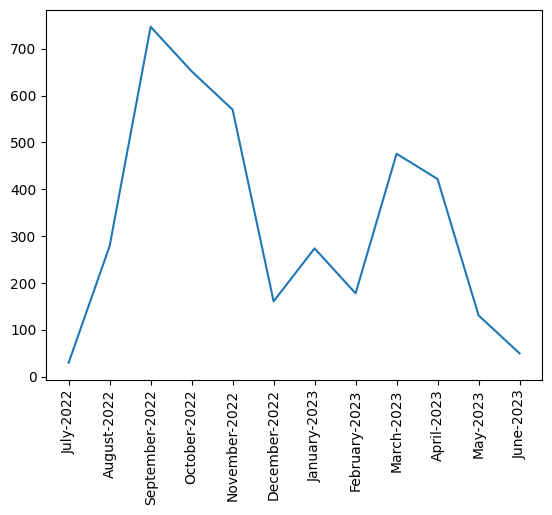

In [490]:
import matplotlib.pyplot as plt
plt.xticks(rotation = 'vertical')
plt.plot(timeline['time'], timeline['Message'])

In [501]:
#Activity

df['day_name'] = df['Date'].dt.day_name()
perday = pd.DataFrame(df['day_name'].value_counts())
type(perday)

pandas.core.frame.DataFrame

In [505]:
period = []
for hour in df['Hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str(hour) + "-" + str('01'))
    else:
        period.append(str(hour) + "-" + str(hour + 1))
        
df['period'] = period
df.head()

,Date,User,Message,Year,Month,Day,Hour,Minute,Month_Num,day_name,period
0,2022-07-30 12:21:44,The Iron Legion,‎Messages and calls are end-to-end encrypted. ...,2022,July,30,12,21,7,Saturday,12-13
1,2022-07-30 12:21:44,Ayush Jamdar EE20 IITM,‎Ayush Jamdar EE20 IITM created this group\n,2022,July,30,12,21,7,Saturday,12-13
2,2022-07-30 16:11:43,The Iron Legion,‎You joined using this group's invite link\n,2022,July,30,16,11,7,Saturday,16-17
3,2022-07-30 16:44:11,Daddy CE20 IITM,‎Daddy CE20 IITM changed this group's icon\n,2022,July,30,16,44,7,Saturday,16-17
4,2022-07-30 16:25:18,Adarsh Pandey ED21 IITM,Av dekha na kaise hm bachcho ko ditch krke par...,2022,July,30,16,25,7,Saturday,16-17
